# An Investigation of the Properties of the Lane-Emden Equation

## Introduction

When trying to understand the properties of stars, there is only so much we can learn via direct observation. This allows us to learn about many of the surface-level features of the star. However, when it comes to analyzing some of the properties of the star that we cannot see, such as the mass distribution or the exact nature of the fluid beneath the stellar surface, we must rely on the use of approximations and assumptions about specific features of stars to help fill in 
the gaps in our knowledge to create models of these phenomena.

For this investigation, we will be looking more deeply into one such feature, the distribution of mass throughout the star. This quantity, which is directly related to the gravitational potential within a star, is approximated in a variety of different ways. Of these different methods of quantifying stellar gravitational potential, the most prevelant change that is made from model to model, is the assumptions made about the nature of the fluids within the star. In the case of the **Lane-Emden** equation, the ordinary differential equation that we will be the focus of our investigation, we **assume** that the fluid inside of the star is **polytropic**, that is to say that the fluid inside the star obeys the equation of state: 
$$\rho V^n = C$$
Where $\rho$ is the density, $V$ is the volume, $C$ is some constant, and $n$ is the *polytropic index* which helps indicate the quantity that remains constant based on our assumptions. This last constant is especially important as we'll see in the actual equation itself.

Additionally, we will also be assuming that the objects we are modeling are spherically symetrical, that is to say that for any given radius, the object will be at the same density in all directions. 

From the assuption made above and some manipulation of *Poisson's equation* for gravitational potential we find this equation:

$$\frac{1}{\xi^2} \frac{d}{d\xi}(\xi^2 \frac{d\theta}{d\xi})+ \theta^n = 0$$

Here, $\xi$ represents the dimensionless radius, $\theta$, relates to the density of a system by the equation: $\rho = \rho_c \theta^n$ ($p_c$ is density at the center) and $n$ is still the same polytropic index as listed above. Typically, this value is changed based on the type of gravitational body we wish to simulate. 

### *Analytical Solution*

When solving this equation analytically, there are only 3 useful analytical solutions, $n = 0,1$ and $5$. Any solutions past $n = 5$, and the binding energy of the system becomes positive and the system is no longer bound, making it a very poor representation of a stellar body

For $n = 0$ - Representative of rocky planets, assumes a constant pressure

$$\theta(\xi) = C_0 - \frac{C_1}{\xi} - \frac{1}{6}\xi^2$$

Where $C_0$ and $C_1$ are constants

For $n = 1$ - Representative of Neutron stars, assumes a constant tempurature

$$\theta(\xi) = a_0\frac{\sin(\xi)}{\xi} + a_1\frac{\cos(\xi)}{\xi}$$

Where $a_0$ and $a_1$ are also constants

For $n = 5$ - Representative of a system of finite mass, but an infinite potential radius. Has no physical analog

$$\theta(\xi) =\frac{1}{\sqrt{1+\xi^2/3}}$$

### *Numerical Solution*

To perform this numerical analysis, all we need to do is solve the equation for $\frac{d^2\theta}{d\xi^2}$ (which can be obtained from some simplification of the original equation).

$$\frac{d^2\theta}{d\xi^2} = \frac{2}{\xi}\frac{d\theta}{d\xi} - \theta^n $$

Now with these equations, we can now predict the how the mass, density vary with each other as well as the radius of the system.

While we can use whatever value of $n$ we want (since they all have numerical solutions), we will only be setting $n$ to the values we're using for our analytical solutions to make effective comparisons between the 2 different methods:

While there are more configurations we can use to model the features of other objects, to prevent this essay from becoming too long, we will only be analyzing these 3 values.



## Methodology \ Results

In this investigation, we will be relying on some of the standard python libraries along with the odeint() function from the scipy library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

We also import some additional libraries to generate some animations of our code 

In [2]:
from IPython.display import display, clear_output
import time

Below, we show the equation we will be using for the investigation

In [3]:
def lane_emden(u,xi,n):
    """
    Arguments:
        u: a list of values theta and theta', represent unitless mass and 
        its change as a function of xi respectively

        xi: represents unitless radius starting from the center of the 
        mass

        n: the polytropic index, value depends on the kinds of 
        assumptions made in our model
    
    Returns:
        a list of the derivatives of phi and theta respectively
    """
    # separating incoming variables
    y,z = u[0],u[1]
    
    # defining values for the change in theta and theta'
    dpsi_dt = z
    ddpsi_dt = -2/xi*z - y**n
    
    return [dpsi_dt,ddpsi_dt]

### Phase Plots

We will begin by analyzing the phase portrait of the Lane Emden equation under different assumptions to get a more broad idea of how this equation behaves. To do this we will use the *animate_streamplot* function to plot an animation of the phase portrait as it varies as a function of $\xi$. Additionally, we also include a plot of data from the data from the solved equation at the standard initial conditions ($\theta = 1$ and $\theta' = 0$) to understand how well the solved equation lines up with the phase plot. However, one limitation from this, is that the actual equation itself varies with radius in addition to density and its derivative. This means that in each frame of the animation, the exact solution will only appear as a single point rather than a full line on the plot, which, in turn will limit what we are able to learn about the actual solved solution as it varies as a function of the radius.

In [4]:
def animate_streamplot(n, xi_max):
    """
    A function I made to animate streamplots with the lane_emden() 
    function plots an animation of the streamplot (x = theta, y = theta') 
    at different values of xi
    
    Arguments:
        n: the polytropic index, value depends on the kinds 
        of assumptions made in our model, can be an integer 
        or a float
        
        xi_max: value of the unitless radius which the animation
        iterates towards can also be either an int or a float
    
    Returns:
        an animation of the phase plot at xi = 0.001 to whatever xi we specify
    """
    # defining array of xi values (don't set lower bound to 0 to avoid bugs)
    xi_arr = np.linspace(0.001,xi_max,31)
    
    # setting initial conditions for exact soln
    ode_inits = [1,0]
    
    # obtaining array of exact solns and labeling the arrays
    u = odeint(lane_emden, ode_inits, t = xi_arr, args = (n,))
    theta_exact = u[:,0]
    dtheta_exact = u[:,1]
    
    # defining arrays for theta and theta'  
    theta = np.linspace(0, 5, 200)
    dtheta = np.linspace(-5, 5, 200)
    
    # turning them into meshgrid objects
    Theta, DTheta = np.meshgrid(theta, dtheta)

    fig = plt.figure()
    ax = plt.axes()
    
    # for loop to run animation
    for frame in range(len(xi_arr)):
        u = lane_emden([Theta, DTheta],xi_arr[frame],n)
        theta_dot = u[0]
        dtheta_dot = u[1]
        
        # generating streamplot for the frame
        ax.streamplot(Theta, DTheta,theta_dot,dtheta_dot)
        
        # plotting location of exact answer
        ax.plot(theta_exact[frame],dtheta_exact[frame], 
                marker = "o", color = "r")
        
        ax.set_xlabel(r"$\theta$ (Density)", fontsize = 15)
        ax.set_ylabel(r"$\theta$'", rotation = 0, fontsize = 20)
        ax.set_title(rf"n = {n}, $\xi$ = {np.round(xi_arr[frame], 2)}", fontsize = 20)
        ax.set_xlim([0,5])
        
        # prevents last frame from being deleted
        if xi_arr[frame] == xi_arr[-1]:
            break
        else:
            display(fig)
            time.sleep(0.00001)
            plt.cla()
            clear_output(wait=True)

Starting with $n = 0$, for a rocky planet like object, iterating until $\xi = 2.5$, when the exact solution leaves the bounds of the plot

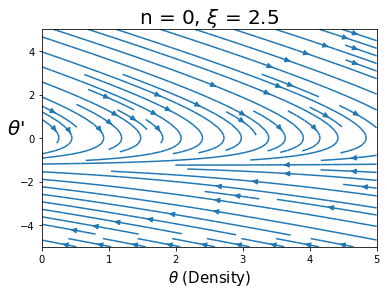

In [5]:
animate_streamplot(n = 0, xi_max = 2.5)

**Fig 1.** As we see in the above plot at $n = 0$, at $\xi = 0$ there seems to be a trend in the streamplot for the $\theta'$ to converge to $0$, reguardless of the initial mass. Now, as $\xi$ increases this $\theta$' convergence point becomes the point by which the rest of the phase plot oscillates around by the time that $\xi$ approaches $7$. As for the exact solution, we do find that it follows the phase plot pretty well until it enters a negative density at ~$\xi = 2.5$ at which point the function has left the radius of the planet and we no longer need to iterate.

With $n = 1$, for a Neutron star like object

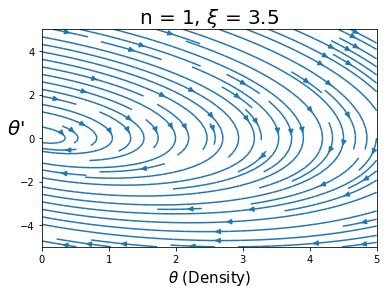

In [6]:
animate_streamplot(n = 1, xi_max = 3.5)

**Fig 2.** The above plot shows a somewhat similar trend to the $n = 0$ plot, as we do see the similar feature of the convergence of $\theta '$ to $0$ that eventually becomes a point by which the rest of the plot oscillates around, except now it is rotated slightly clockwise, and the function exits the outer radius at ~$\xi = 3.2$.

With $n = 3$ for a main-sequence star like object

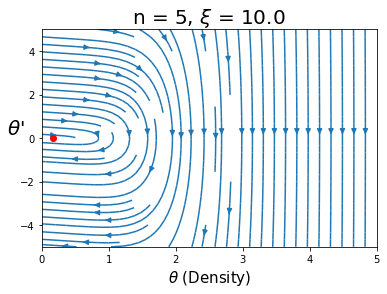

In [7]:
animate_streamplot(n = 5, xi_max = 10)

**Fig 3.** This plot shows a slightly more complex pattern that begins with $\theta'$ converging to $0$ like in the previous plots. However this time, we  see a slightly more complext initial pattern that then evolves into a slightly different rotation pattern than seen in the previous models. We also see a far more interesting behavior in the model as well. As the animation progresses, we see the dot begin to settle around $\theta' = 0$ as the dot approaches $\theta = 0$. This behavior is because the object we are modeling has an infinite radius, and no matter what $\xi$ value we iterate to, the dot will never cross $\theta = 0$.

While these phase plots do give us a pretty good idea of how the density of the object behaves, it still not as clear as it could be when it comes to visualizing the relationship between $\theta$ and $\xi$. Therefore, in the following section, we will show a more direct relationship with the exact (numerically solved) equation.

### $\theta$ vs $\xi$ Analysis

We now move on to plotting the actual function itself. To do this, we employ the use of the *lane_emden* function mentioned above as well as the *odeint* function from scipy. 

To begin, we will start off with the initial conditions $\theta = 1$ and $\theta' = 0$ in accordance with the standard boundary conditions that are generally used to solve this equation

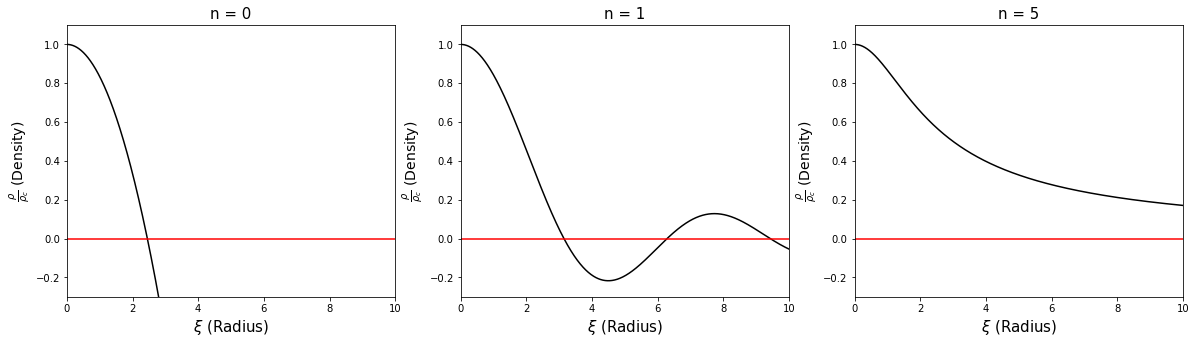

In [8]:
# setting initial values
u0 = [1,0]

# generating list of n values
n_list = [0,1,5]

# generating radius array (don't set lower bound to 0 to avoid bugs)
xi = np.linspace(0.001,10,1000)

# plotting 3 subplots of lane_emden at 3 different n values
fig, ax = plt.subplots(1,3,figsize = [20,5])
for n in range(len(n_list)):
    # calling the odeint function to obtain values of theta
    u = odeint(lane_emden, u0, t = xi, args = (n_list[n],))
    theta = u[:,0]
    
    # plotting the results of odeint
    ax[n].plot(xi,u[:,0], color = "black")
    ax[n].set_xlim([0,10])
    ax[n].set_ylim([-0.3,1.1])
    ax[n].set_xlabel(r"$\xi$ (Radius)", fontsize = 15)
    ax[n].set_ylabel(r"$\frac{\rho}{\rho_c}$ (Density)", fontsize = 14)
    ax[n].set_title(f"n = {n_list[n]}", fontsize = 15)
    
    # adding line at theta = 0 for clearer view of the radius
    ax[n].axhline(0, color = "red")

**Fig 4.**  Here we have 3 different plots of $\theta$ (or $\frac{\rho}{\rho_c}$ as it's refered to in the plot) as a function of $\xi$ (the radius) with each plot using a Lame Emden equation of a different $n$ value. 

For $n = 0$ we find that the plot consists of a sharply downwards-pointing curve. once $\theta$ reaches $0$ we consider that to be the outermost radius of the object. Upon further analysis of the point at which the plot crosses the x-axis, we find that for the case of the $n = 0$ object the unitless radius is about $\xi = \sqrt6$. 

For $n = 1$, we see a bit of a bizzare trend in which the curve actually enters an oscillatory pattern, but since we consider the *1st* time the plot dips below $0$ as the radius of the object, which in this case is $\xi = \pi$, where the plot first crosses the x-axis.

For $n = 5$, we see that the curve begins to flatten as it approaches 0, were we to extend the $\xi$ axis to $\infty$, we would find that the plot never reaches $0$ which is indicative of the fact that this object has an infinite radius.

*Note: The radii that we find for these plots will be in perfect agreement with the phase plots as the same data in both uses of the odeint function*

## Discussion

### Evaluating Accuracy

Before we begin to analyze our results, we must first discuss how valid these numerical results are (i.e. how similar the numerical results are to the analytical results

First, we write out the equations for each of the analytical results, making sure to set the same initial conditions that we used for the numerical solutions.

In [9]:
# analytical soln for n = 0
def n0_analytical(xi):
    # setting theta_0 
    c0 = 1
    # setting theta_0' 
    c1 = 0
    theta = c0 - c1/xi - xi**2/6
    return theta

# analytical soln for n = 1
def n1_analytical(xi):
    # setting constants
    a0 = 1
    a1 = 0
    theta = a0*np.sin(xi)/xi + a1*np.cos(xi)/xi
    
    return theta

# analytical soln for n = 5
def n5_analytical(xi):
    # no cosntsants in soln
    theta = 1/np.sqrt(1+xi**2/3)
    
    return theta

# putting all the analytical solns into a list for plotting use
analytical_func_list = [n0_analytical, n1_analytical, n5_analytical]

Below, we have a plot very similar to **Fig. 4**, except now with the analytical results being plotted on top of the numerical results

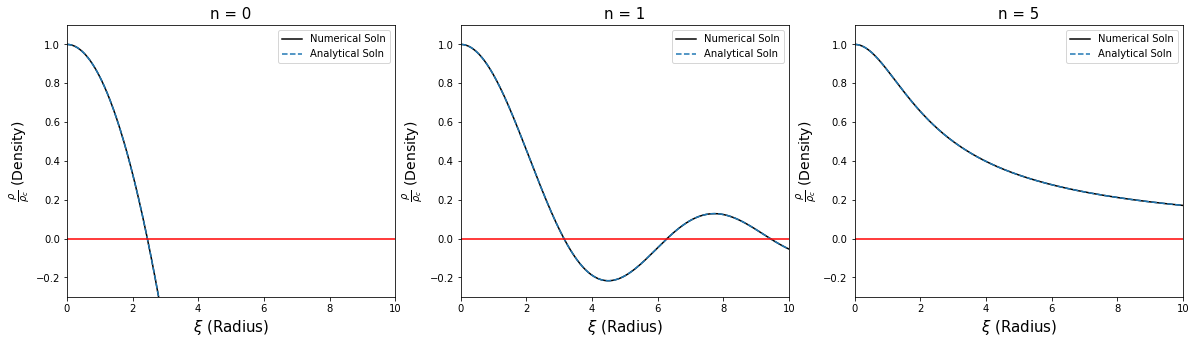

In [10]:
# using same initial conditions set above

# plotting 3 subplots of lane_emden at 3 different n values
fig, ax = plt.subplots(1,3,figsize = [20,5])
for n in range(len(n_list)):
    # calling the odeint function to obtain values of theta
    u = odeint(lane_emden, u0, t = xi, args = (n_list[n],))
    theta = u[:,0]
    
    # calling in analytical data
    an_sol = analytical_func_list[n]
    an_theta = an_sol(xi)
    
    # plotting the results of odeint
    ax[n].plot(xi,theta, color = "black", label = "Numerical Soln")
    
    # now including the analytical solutions
    ax[n].plot(xi,an_theta, linestyle = "dashed", label = "Analytical Soln")
    
    ax[n].set_xlim([0,10])
    ax[n].set_ylim([-0.3,1.1])
    ax[n].set_xlabel(r"$\xi$ (Radius)", fontsize = 15)
    ax[n].set_ylabel(r"$\frac{\rho}{\rho_c}$ (Density)", fontsize = 14)
    ax[n].set_title(f"n = {n_list[n]}", fontsize = 15)
    ax[n].legend()
    
    # adding line at theta = 0 for clearer view of the radius
    ax[n].axhline(0, color = "red")

**Fig 5.** As we can see from the above plots, the analytical solutions match the numercial solutions almost perfectly. This indicates that the numerical methods did an excellent job in predicting the behavior of the equation, meaning that both the phase plots (figures 1,2 & 3) as well as the above figure are sufficient representations of the analytical solutions.

### Evaluating Physical Accuracy

Now that we have plots of the Lane Emden equation, as well as a confirmation that our numerical analysis is functioning as intended, How accurately represent the physical objects themselves?

For the case of $n = 0$, the case for rocky planets, we work under the assumption that pressure is constant. This assumption is overall quite effective since overvall, rocky planets have a relatively similar density throughout, at least in comparison to other astral bodies, like stars, that are composed of more compressible gas rather than rigid solids and liquids.

For the case of $n = 1$, the case for Neutron stars where we assume an isothermal environment. Here, confirming as to whether or not we have a good approximation of the properties of a real neutron star is rather difficult due to the large amount of information that we lack on these objects. However, based on the information we do have, it seems as though this assumption has proven to be quite effective so far.


As for the case of $n = 5$ for an object of infinite radius, since there is no real physical object like this, we unfortunately are rendered unable to make any kind of comparison to any known physical objects. 

## Conclusion

Based on the analysis performed in this essay, we find that the numerical analysis of the Lane Emden equation is one that varies greatly depending on the $n$ values that we use for our analysis, allowing us to apply the equation to a large variety of different kinds of astral bodies, both physical and theoretical. Additionally, we also find that the numerical analysis also does a very good job of predicting the existing analytical solutions for the equations that are capable of making quite effective predictions of real physical bodies despite the assumptions we make about them.

## Works Cited

1. Caltech. (n.d.). 1. Polytropes–derivation and solutions ofthe lane-emden equation all. Caltech Department of Astronomy. Retrieved September 24, 2022, from https://sites.astro.caltech.edu/~jlc/ay101_fall2015/ay101_polytropes_fall2015.pdf 
2. Wikimedia Foundation. (2022, January 17). Polytrope. Wikipedia. Retrieved September 24, 2022, from https://en.wikipedia.org/wiki/Polytrope 
3. Wikimedia Foundation. (2022, July 10). Polytropic process. Wikipedia. Retrieved September 24, 2022, from https://en.wikipedia.org/wiki/Polytropic_process 
4. Wikimedia Foundation. (2022, June 14). Lane–emden equation. Wikipedia. Retrieved September 24, 2022, from https://en.wikipedia.org/wiki/Lane%E2%80%93Emden_equation 
5. Zingale, M. (2017). Introduction to Computational Astrophysical Hydrodynamics. Open Astrophysics Bookshelf. 